In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from predict.plot_helper import PlotHelper
from predict.stat_tests import StatTestWrapper
from predict.transformations import TransformHelper
from itertools import product
from predict.arima_helper import ArimaHelper
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
CSV_AQI_PATH = '../datasources/aqi_calc/'
POL_CODES = [7, 6001, 5, 10, 1, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}

In [3]:
def get_dataframes_for_pollutant(pollutant_id: int) -> dict[str, pd.DataFrame]:
    directory = os.path.join(CSV_AQI_PATH,  str(pollutant_id))
    df_dict = {}
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, parse_dates=True, index_col='DatetimeEnd')
        df_dict[filename[:filename.index('.')]] = df
    return df_dict

In [4]:
pollutant_id = 6001
dfs = get_dataframes_for_pollutant(pollutant_id)

Временные ряды AQI. Период: ALL


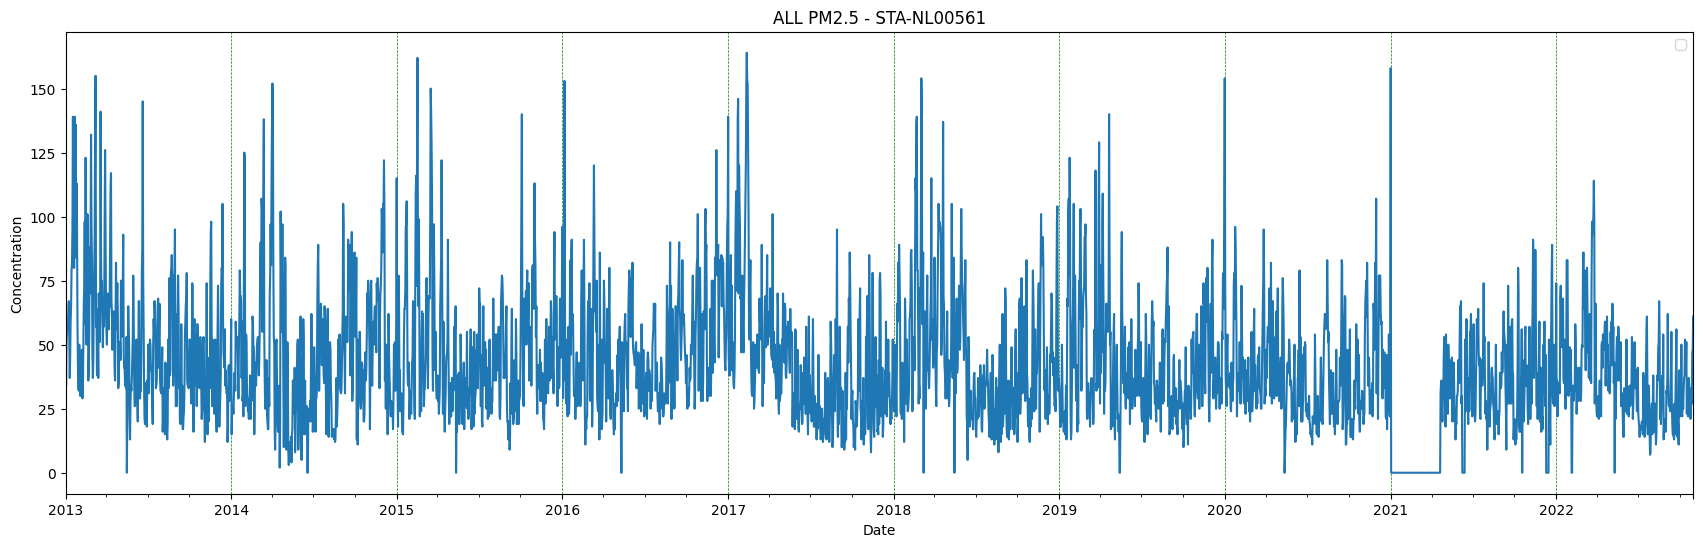

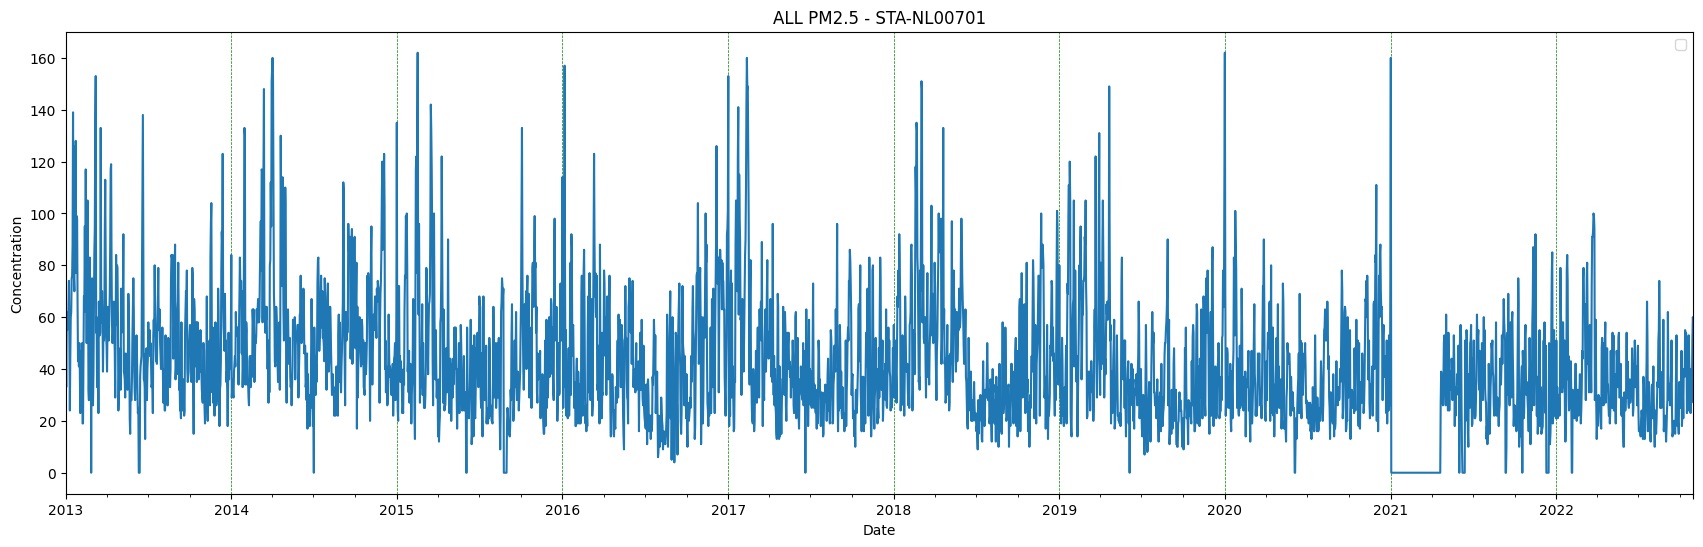

In [5]:
period_name = 'ALL'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: YEAR


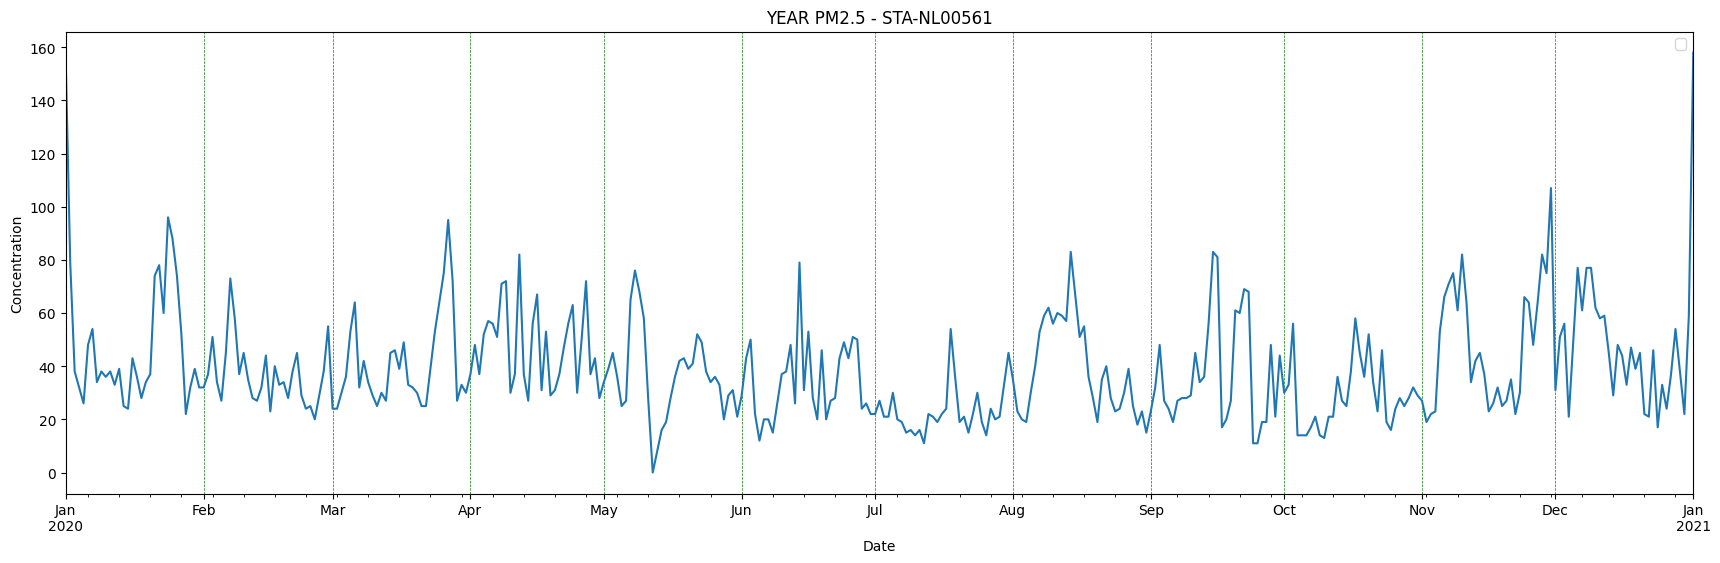

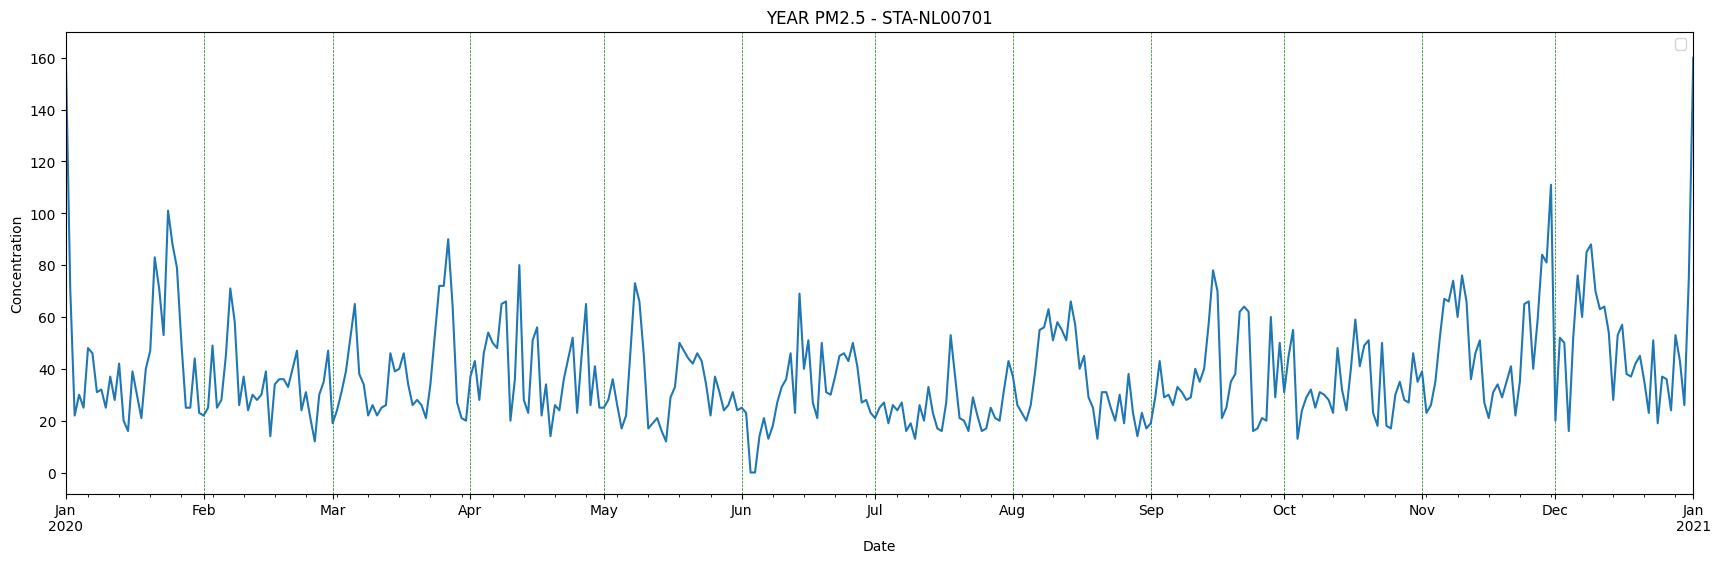

In [6]:
period_name = 'YEAR'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-01-01', date_to='2021-01-01', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}')

Временные ряды AQI. Период: MONTH


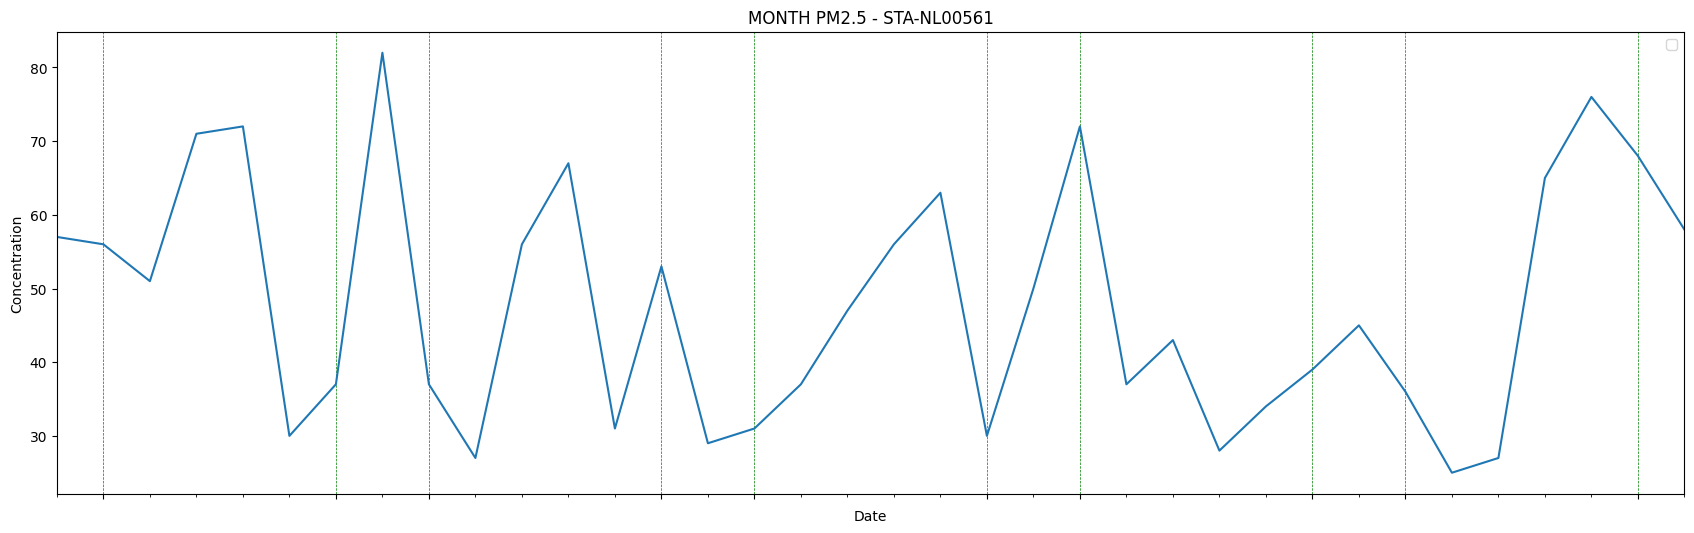

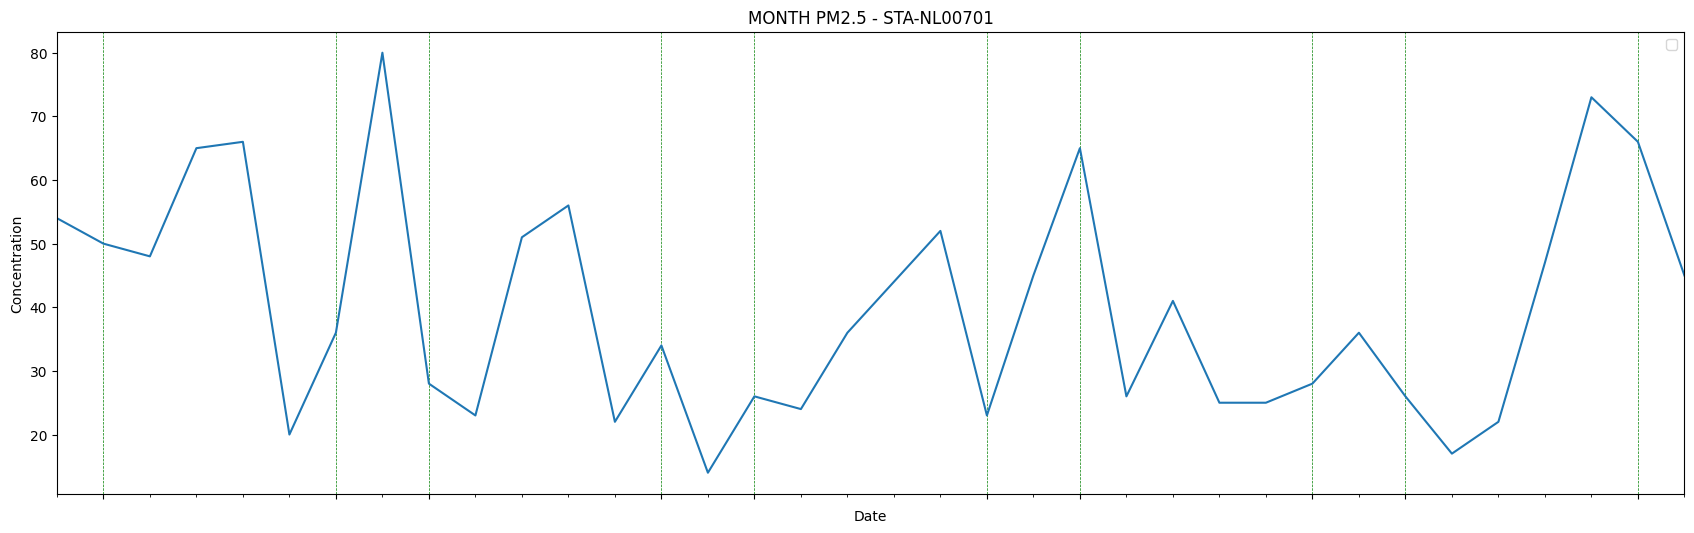

In [7]:
period_name = 'MONTH'
print(f'Временные ряды AQI. Период: {period_name}')
for k in dfs.keys():
    PlotHelper.plot_ts(dfs[k], date_from='2020-04-05', date_to='2020-05-10', title=f'{period_name} {POL_NAMES[pollutant_id]} - {k}', xticks='w')

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования
-----STA-NL00561-----
The ADF test statistic -7.156821    pvalue: 0.00   maximal Lag: 21   critical values: {'1%': -3.4321840837544655, '5%': -2.8623503951245417, '10%': -2.567201386568325}
ADF: stationary
The KPSS test statistic 2.155526    pvalue: 0.01   maximal Lag: 31   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: stationary


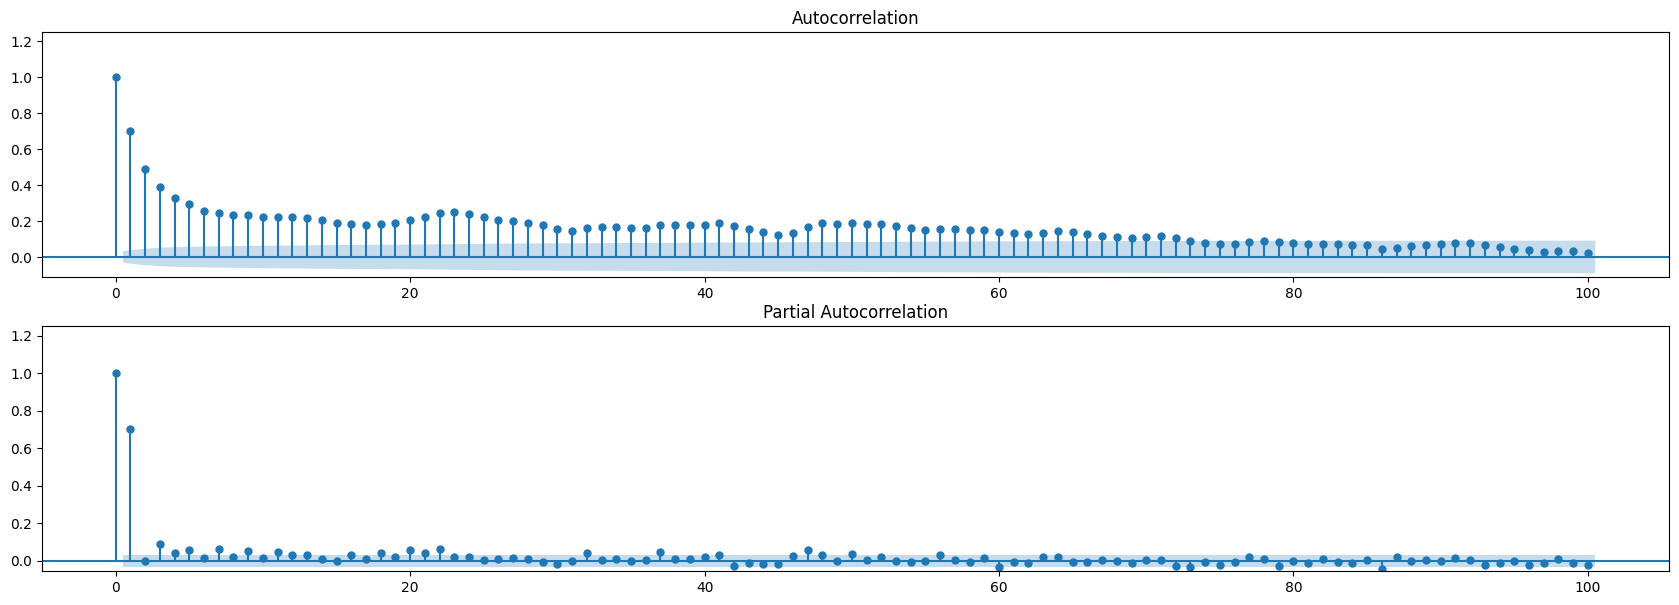

-----STA-NL00701-----
The ADF test statistic -6.686155    pvalue: 0.00   maximal Lag: 22   critical values: {'1%': -3.432184598306239, '5%': -2.8623506224106547, '10%': -2.5672015075684036}
ADF: stationary
The KPSS test statistic 3.285795    pvalue: 0.01   maximal Lag: 31   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: stationary


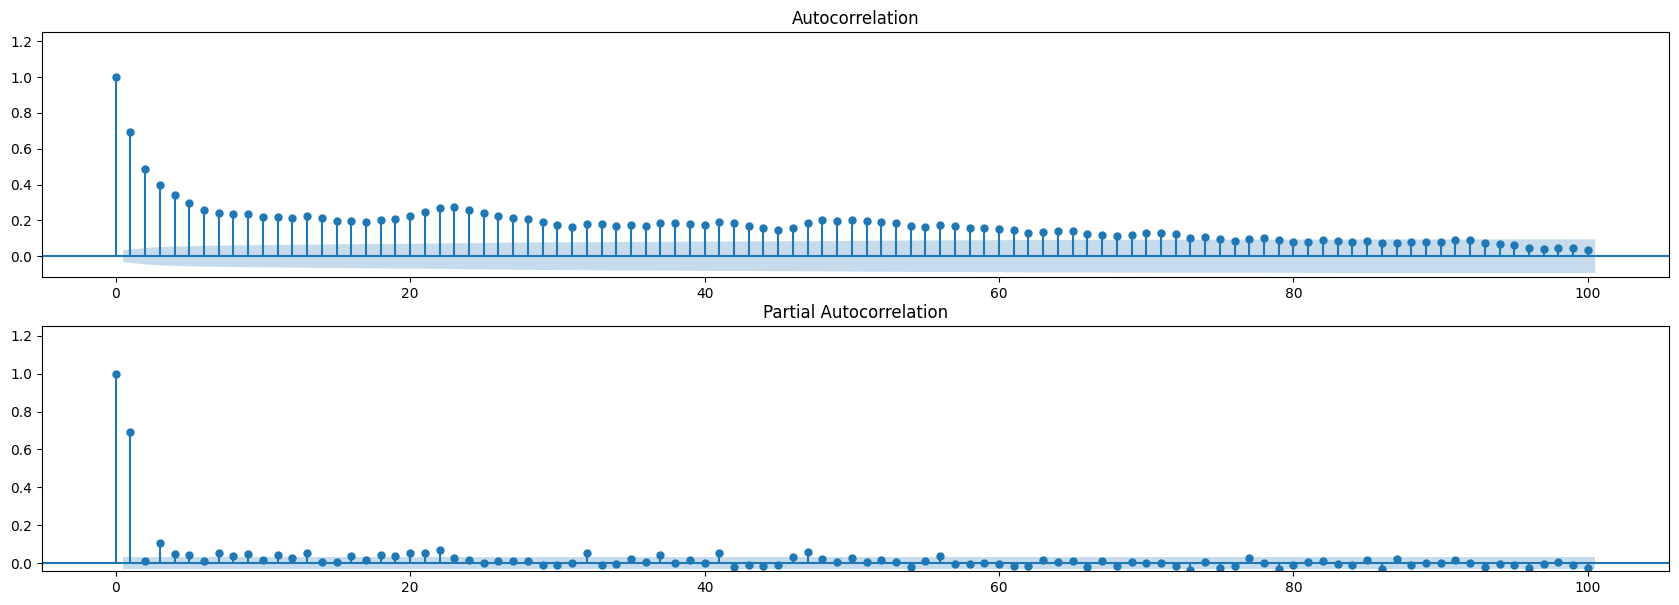

In [8]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - без дифференцирования')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году
-----STA-NL00561-----
The ADF test statistic -7.748312    pvalue: 0.00   maximal Lag: 21   critical values: {'1%': -3.4323932558396617, '5%': -2.8624427866963997, '10%': -2.567250573521799}
ADF: stationary
The KPSS test statistic 0.132676    pvalue: 0.10   maximal Lag: 29   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: non-stationary


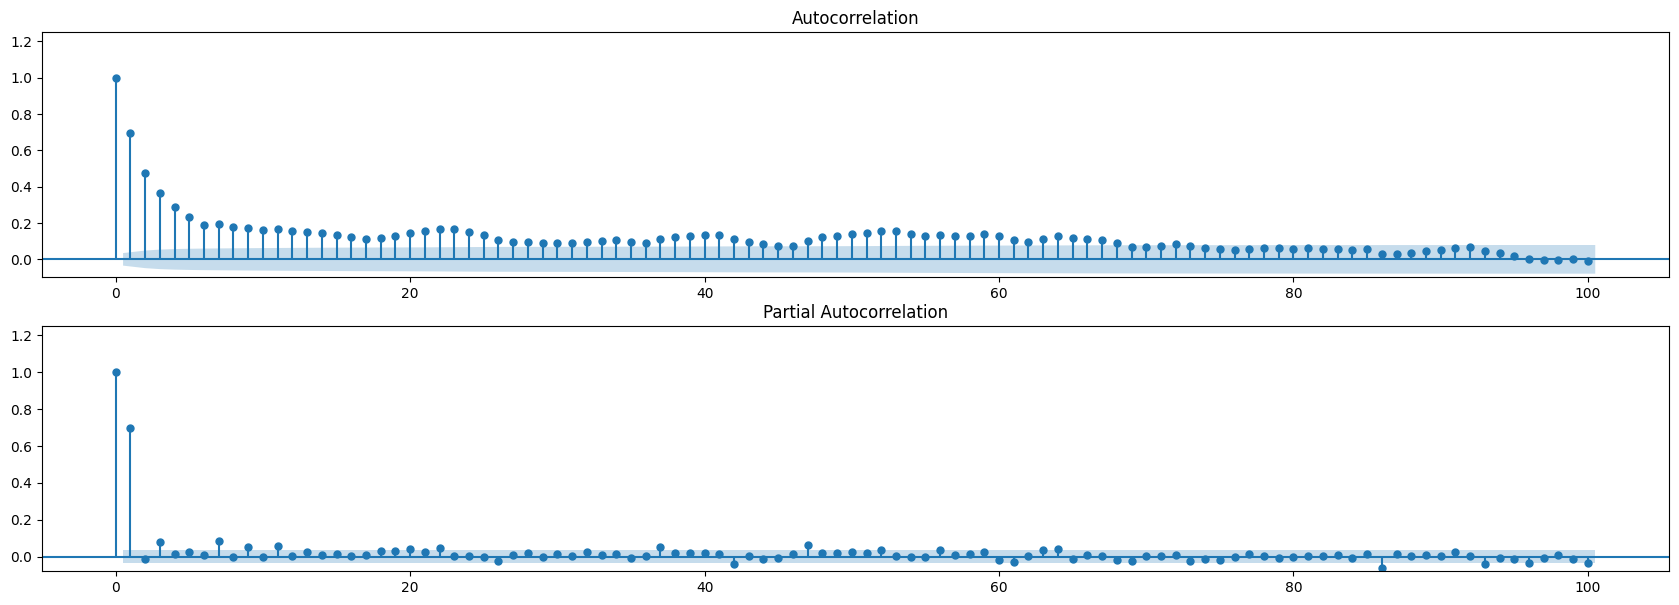

-----STA-NL00701-----
The ADF test statistic -8.065048    pvalue: 0.00   maximal Lag: 21   critical values: {'1%': -3.4323932558396617, '5%': -2.8624427866963997, '10%': -2.567250573521799}
ADF: stationary
The KPSS test statistic 0.110797    pvalue: 0.10   maximal Lag: 28   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: non-stationary


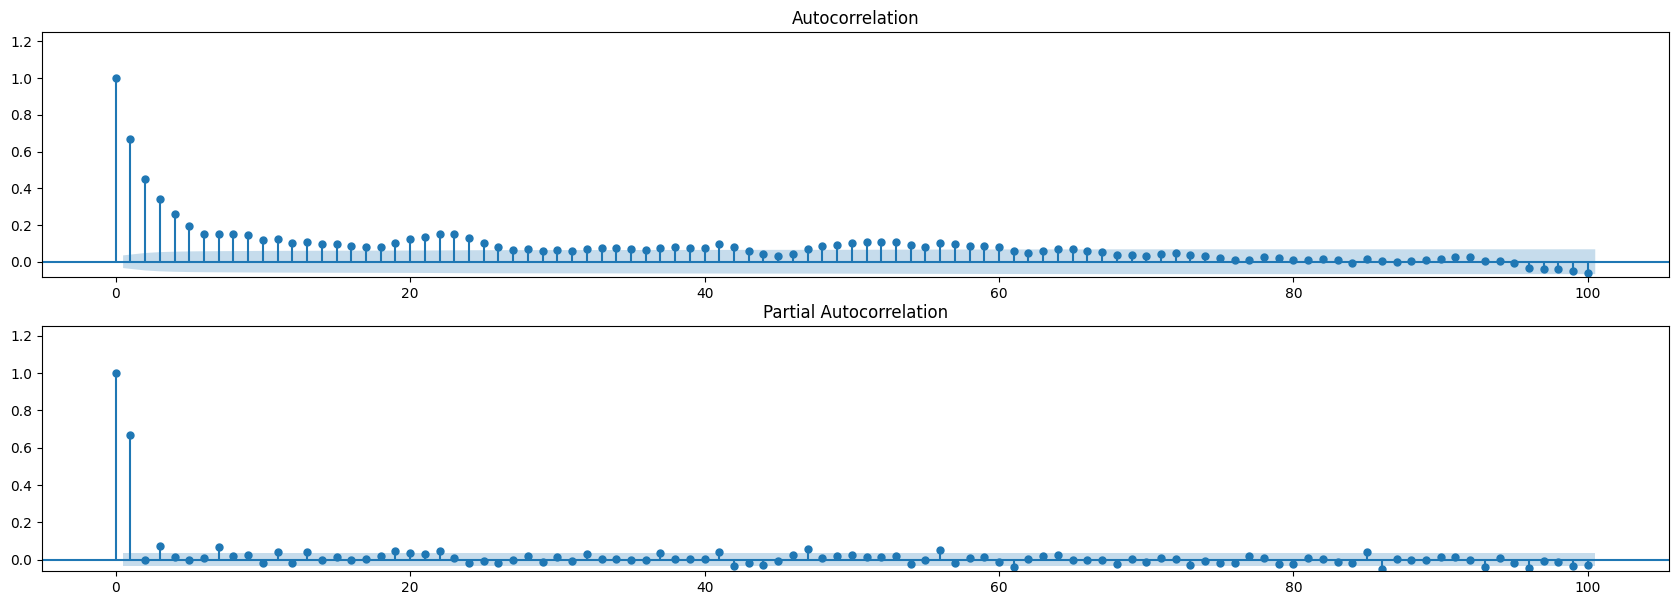

In [9]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по году')
for k in dfs.keys():
    print(f'-----{k}-----')
    StatTestWrapper.pre_analise(dfs[k], [('Y', 1)], lags=100)

Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе
The ADF test statistic -15.260156    pvalue: 0.00   maximal Lag: 29   critical values: {'1%': -3.4321918324656684, '5%': -2.862353817855558, '10%': -2.5672032087248784}
ADF: stationary
The KPSS test statistic 0.001797    pvalue: 0.10   maximal Lag: 6   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: non-stationary


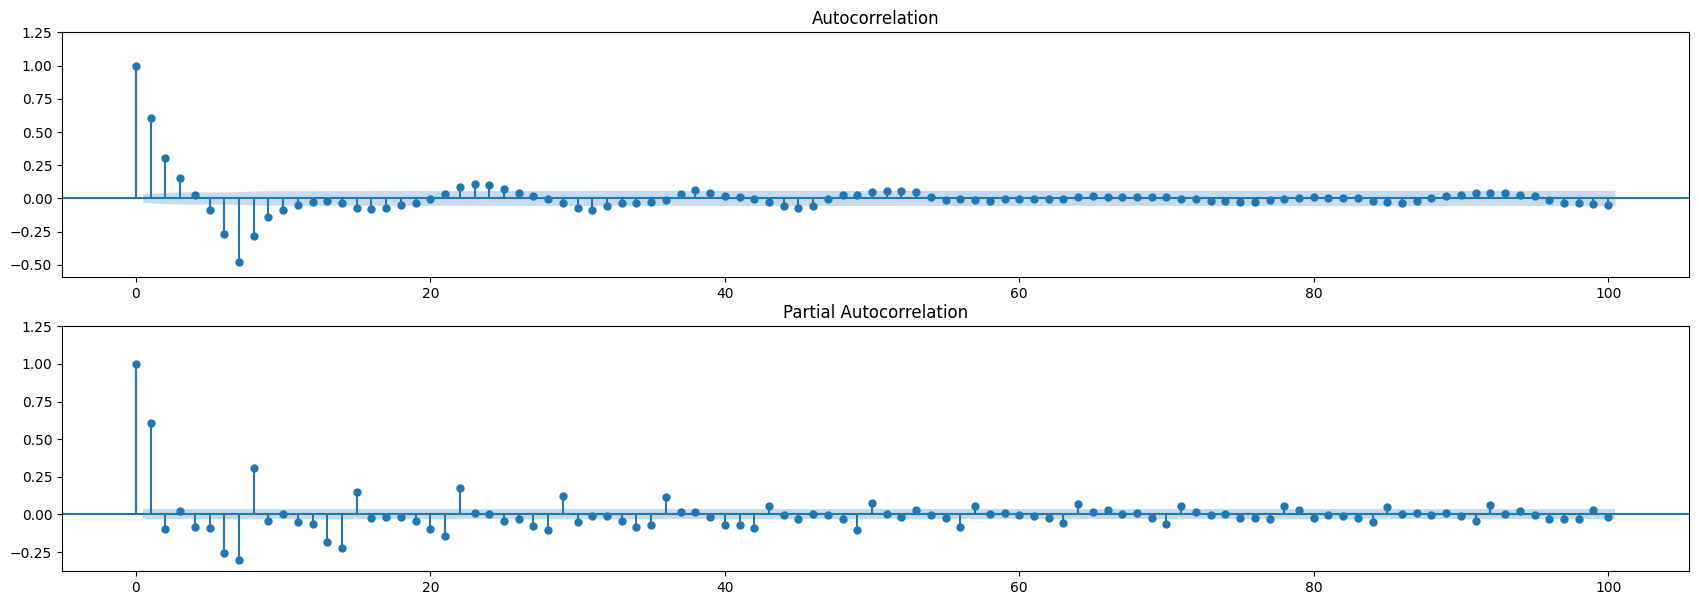

The ADF test statistic -15.163533    pvalue: 0.00   maximal Lag: 29   critical values: {'1%': -3.4321918324656684, '5%': -2.862353817855558, '10%': -2.5672032087248784}
ADF: stationary
The KPSS test statistic 0.001960    pvalue: 0.10   maximal Lag: 4   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: non-stationary


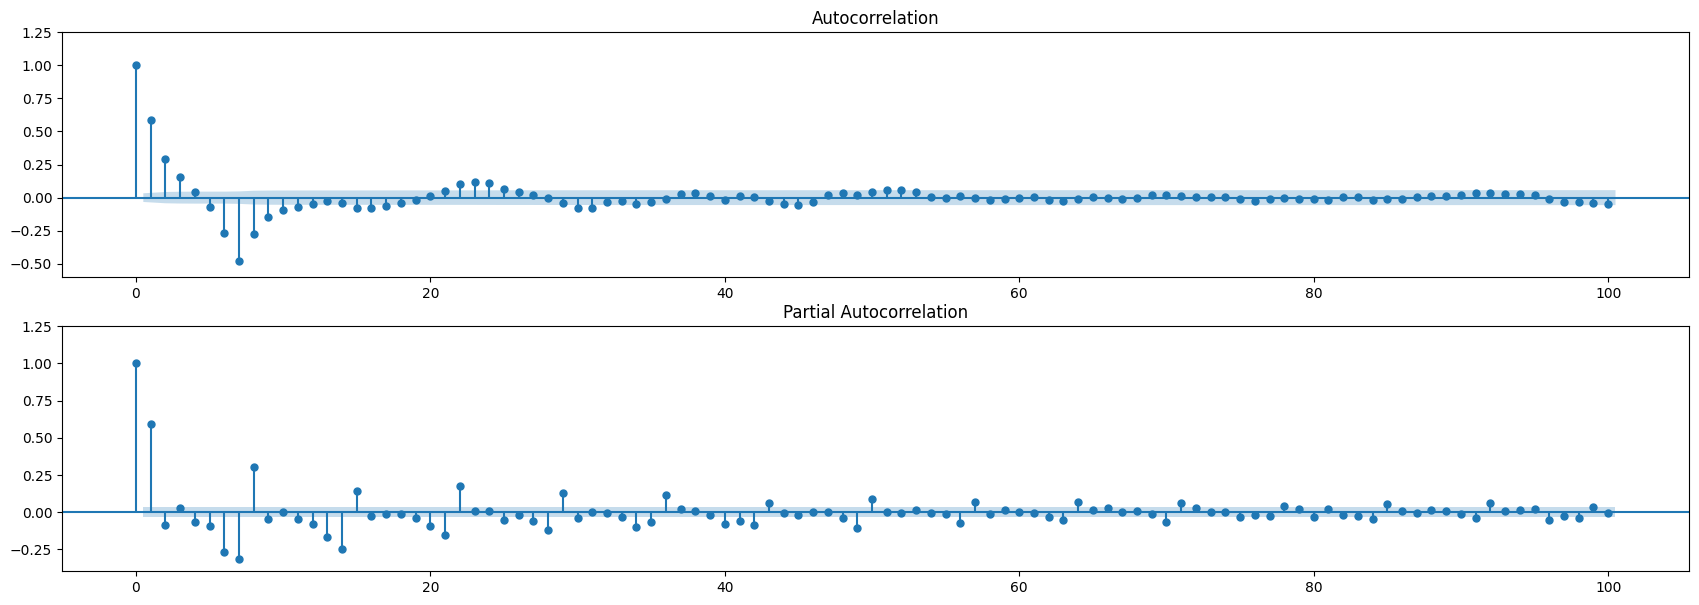

In [10]:
print(f'Проверки на стационарность / Автокорреляцию / Частичную автокорреляцию - с дифференцированием по неделе')
for k in dfs.keys():
    StatTestWrapper.pre_analise(dfs[k], [('W', 1)], lags=100)

In [11]:
import datetime

station0 = list(dfs.keys())[1]
dfs[station0].groupby([d.year for d in dfs[station0].index]).idxmax()

,AQI
2013,2013-03-08 00:00:00+01:00
2014,2014-04-02 00:00:00+01:00
2015,2015-02-16 00:00:00+01:00
2016,2016-01-06 00:00:00+01:00
2017,2017-02-11 00:00:00+01:00
2018,2018-03-03 00:00:00+01:00
2019,2019-04-21 00:00:00+01:00
2020,2020-01-01 00:00:00+01:00
2021,2021-01-01 00:00:00+01:00
2022,2022-03-24 00:00:00+01:00


In [12]:
dfs[station0].groupby([d.year for d in dfs[station0].index]).idxmin()

,AQI
2013,2013-02-26 00:00:00+01:00
2014,2014-07-02 00:00:00+01:00
2015,2015-06-03 00:00:00+01:00
2016,2016-09-04 00:00:00+01:00
2017,2017-06-20 00:00:00+01:00
2018,2018-07-05 00:00:00+01:00
2019,2019-06-05 00:00:00+01:00
2020,2020-06-03 00:00:00+01:00
2021,2021-01-02 00:00:00+01:00
2022,2022-02-04 00:00:00+01:00


In [13]:
# setting initial values and some bounds for them
ps = np.arange(2, 5)
d = np.arange(0, 1)
qs = np.arange(2, 5)
Ps = np.arange(0, 1)
D = np.arange(0, 1)
Qs = np.arange(0, 1)
s = np.arange(0, 1)

# creating list with all the possible combinations of parameters
parameters = product(ps, d, qs, Ps, D, Qs, s)
parameters_list = list(parameters)
len(parameters_list)

9

In [14]:
%%time
arima_wrap = {}
for k in dfs.keys():
    arima_wrap[k] = ArimaHelper(ts=dfs[k], col_name_pred = 'AQI')
    arima_wrap[k].optimize_sarima(parameters_list)

100%|██████████| 9/9 [00:24<00:00,  2.76s/it]

CPU times: user 1min 13s, sys: 2min 6s, total: 3min 20s
Wall time: 45.9 s


In [15]:
for k in dfs.keys():
    print(f'-----{k}-----')
    display(arima_wrap[k].get_best_sarima_params())

-----STA-NL00561-----


(4, 0, 4, 0, 0, 0, 0)

-----STA-NL00701-----


(2, 0, 3, 0, 0, 0, 0)

In [16]:
for k in dfs.keys():
    print(f'-----{k}-----')
    display(arima_wrap[k].predict_best_sarima())

-----STA-NL00561-----


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                 3590
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -15335.839
Date:                Thu, 22 Dec 2022   AIC                          30689.678
Time:                        20:43:09   BIC                          30745.351
Sample:                    01-01-2013   HQIC                         30709.522
                         - 10-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2808      0.053     -5.284      0.000      -0.385      -0.177
ar.L2          1.4230      0.040     35.717      0.000       1.345       1.501
ar.L3          0.3621      0.050      7.181      0.000       0.263       0.461
ar.L4         -0.5044      0.029    -17.104      0.000      -0.562      -0.447
ma.L1          0.9646      0.055     17.561      0.000       0.857       1.072
ma.L2         -0.8328      0.037    -22.452      0.000      -0.905      -0.760
ma.L3         -0.9407      0.049    -19.191      0.000      -1.037      -0.845
ma.L4         -0.0596      0.027     -2.179      0.029      -0.113      -0.006
sigma2       299.6468      4.793     62.521      0.000     290.253     309.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1138.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

-----STA-NL00701-----


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                 3590
Model:               SARIMAX(2, 0, 3)   Log Likelihood              -15370.823
Date:                Thu, 22 Dec 2022   AIC                          30753.646
Time:                        20:43:11   BIC                          30790.762
Sample:                    01-01-2013   HQIC                         30766.875
                         - 10-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6393      0.042     38.573      0.000       1.556       1.723
ar.L2         -0.6394      0.042    -15.054      0.000      -0.723      -0.556
ma.L1         -0.9794      0.045    -21.987      0.000      -1.067      -0.892
ma.L2         -0.0779      0.024     -3.282      0.001      -0.124      -0.031
ma.L3          0.0856      0.029      2.959      0.003       0.029       0.142
sigma2       306.2264      5.062     60.490      0.000     296.304     316.149
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1112.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Проверки остатков
-----STA-NL00561-----


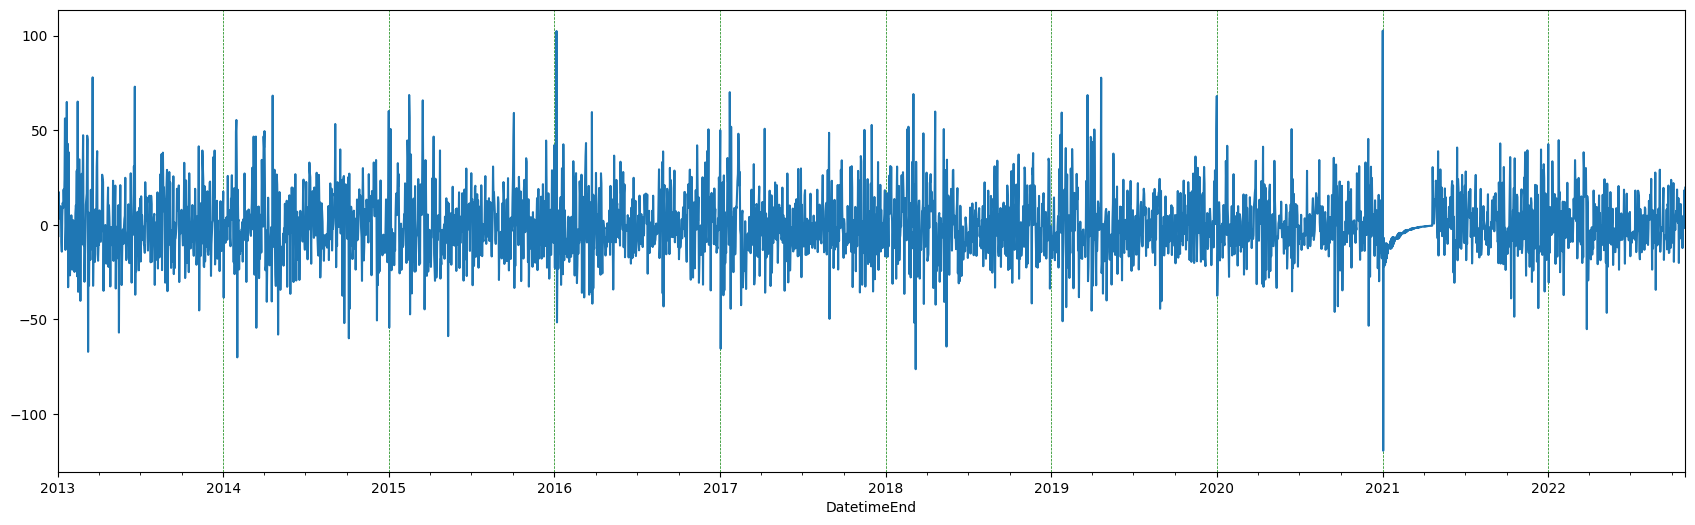

The KPSS test statistic 0.016068    pvalue: 0.10   maximal Lag: 5   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: non-stationary


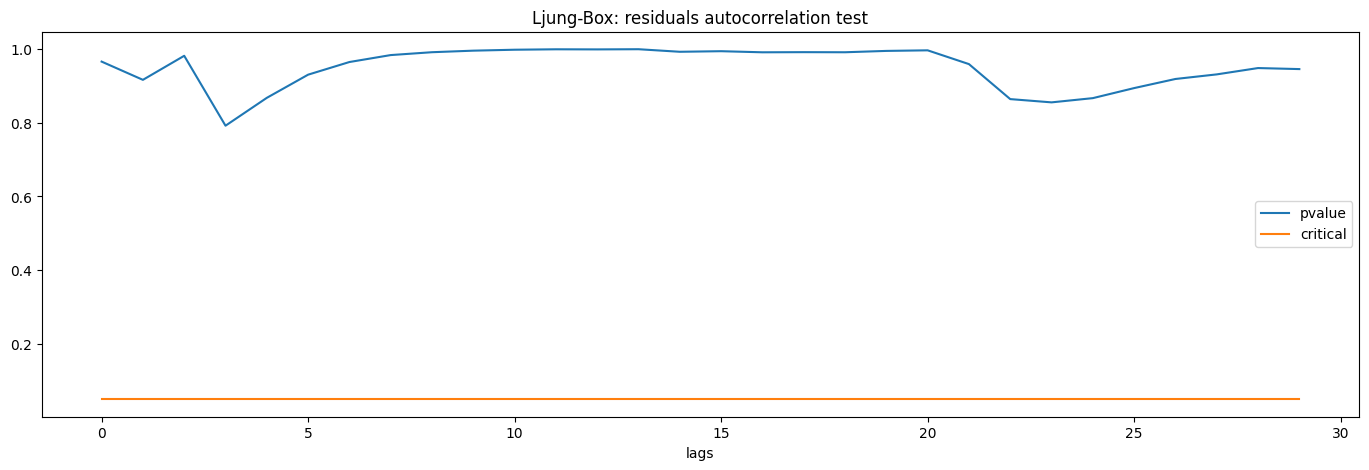

The Durbin-Watson residuals statistics 1.999518
Durbin-Watson: residuals are not correlated
The Wilcoxon residuals statistic 3077546.000000, pvalue: 0.02
Wilcoxon: residuals are biased
The residuals normality statistic: NormaltestResult(statistic=295.3815625038392, pvalue=7.222851306141439e-65)


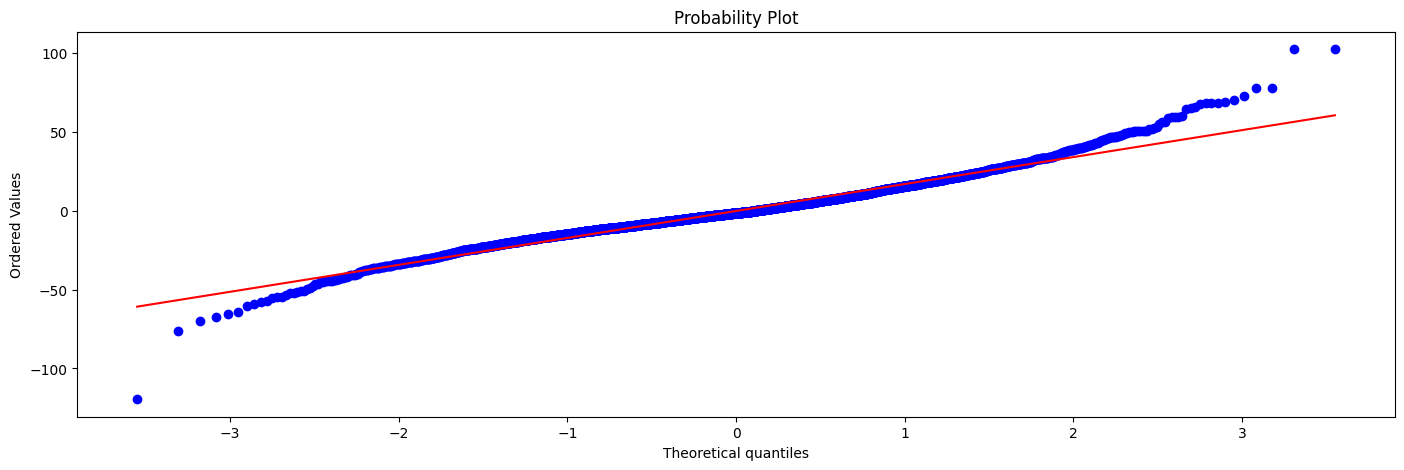

-----STA-NL00701-----


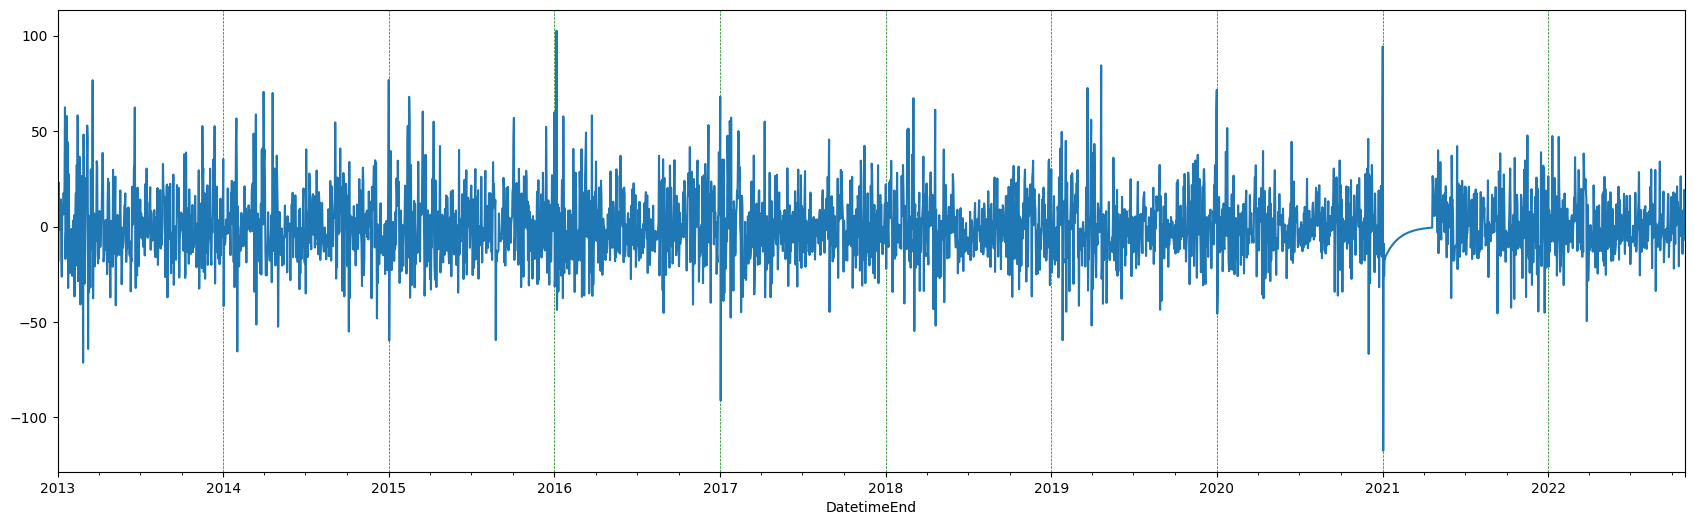

The KPSS test statistic 0.015376    pvalue: 0.10   maximal Lag: 4   table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS: non-stationary


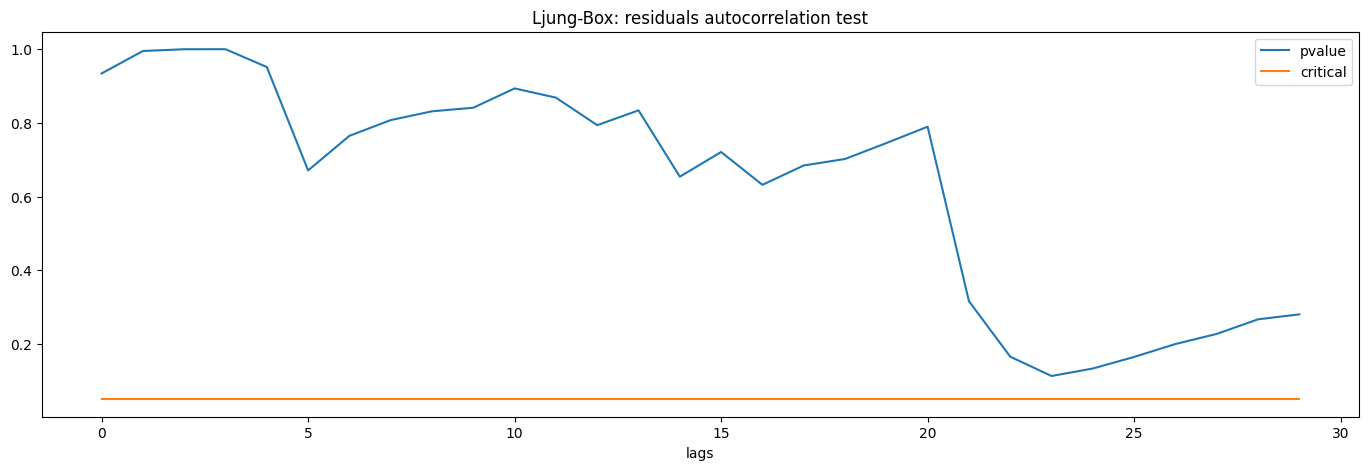

The Durbin-Watson residuals statistics 1.999761
Durbin-Watson: residuals are not correlated
The Wilcoxon residuals statistic 3110490.000000, pvalue: 0.07
Wilcoxon: residuals are biased
The residuals normality statistic: NormaltestResult(statistic=308.68143763913, pvalue=9.347112798684372e-68)


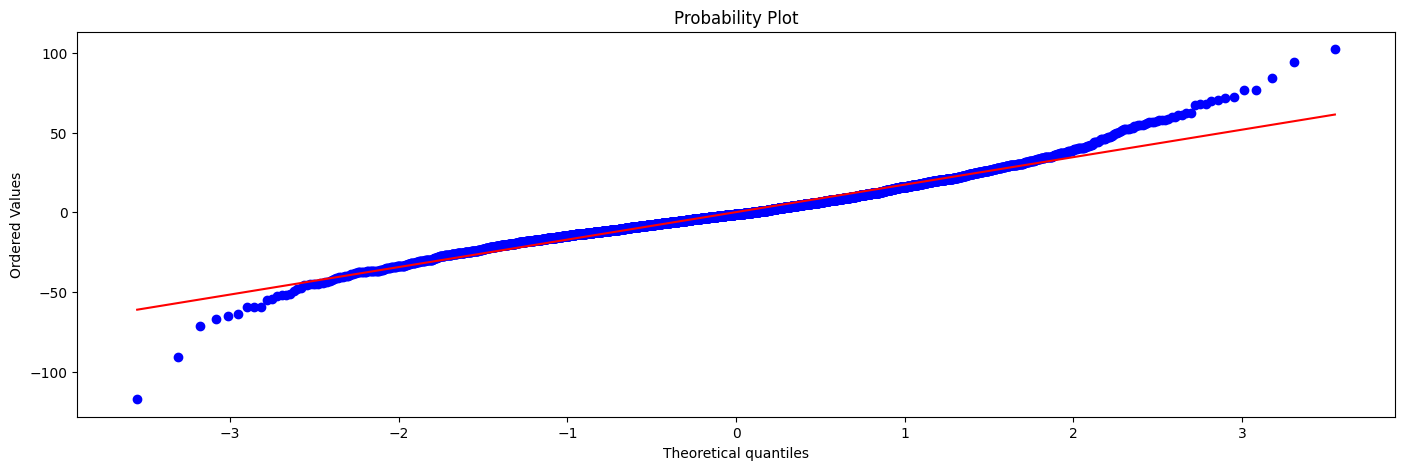

In [17]:
print(f'Проверки остатков')
for k in dfs.keys():
    print(f'-----{k}-----')
    arima_wrap[k].get_residuals_analysis()

-----STA-NL00561-----


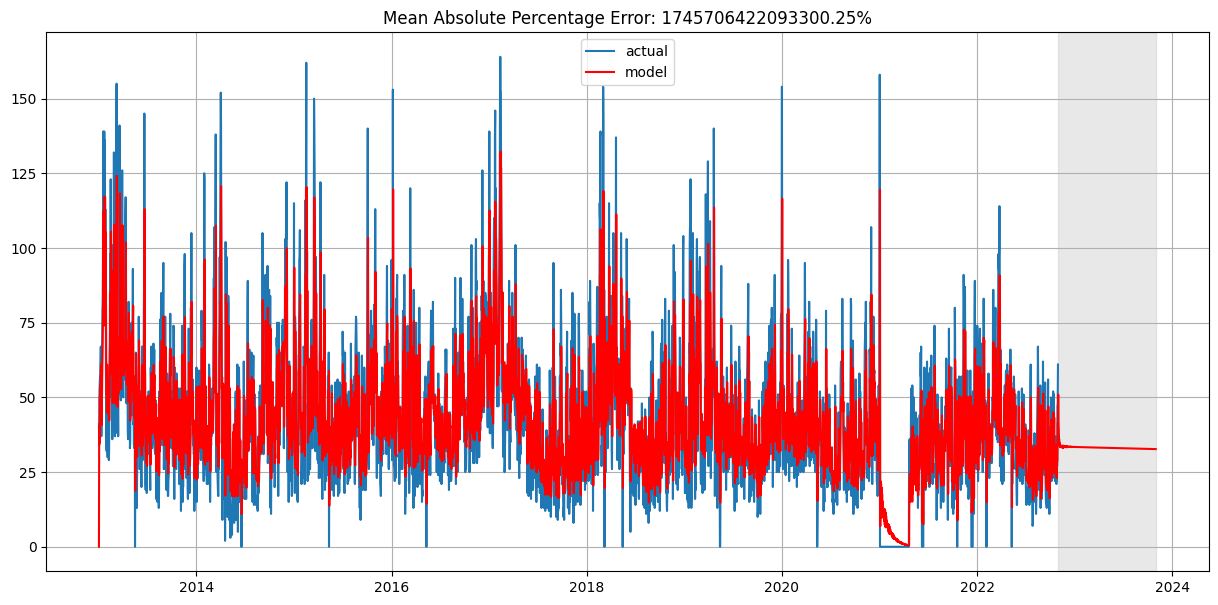

-----STA-NL00701-----


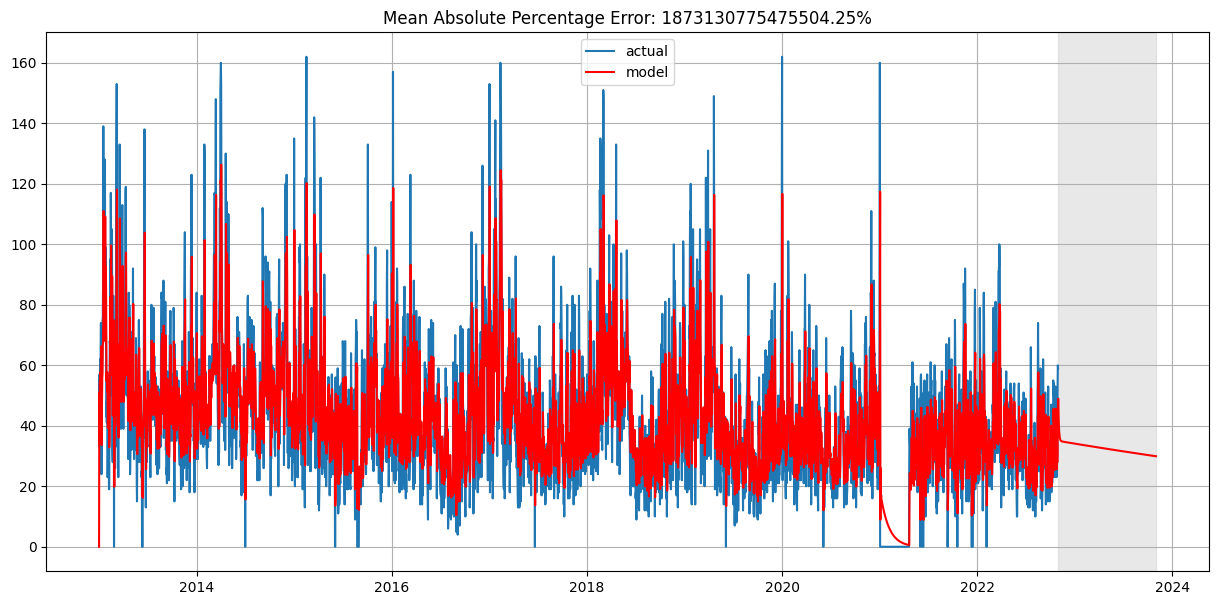

In [18]:
for k in dfs.keys():
    print(f'-----{k}-----')
    arima_wrap[k].plot_sarima(365)

In [66]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

tscv = TimeSeriesSplit(n_splits = 5)
rmse = []
all_predictions = None
for train_index, test_index in tscv.split(dfs['STA-NL00701']):
    cv_train, cv_test = dfs['STA-NL00701'].iloc[train_index], dfs['STA-NL00701'].iloc[test_index]
    p, d, q, P, D, Q, s = arima_wrap['STA-NL00701'].get_best_sarima_params()
    model = sm.tsa.statespace.SARIMAX(dfs['STA-NL00701']['AQI'], order=(p, d, q), seasonal_order=(P, D, Q, s))\
            .fit(disp=-1)
    predictions = model.predict(start=cv_train.shape[0], end=cv_train.shape[0] + cv_test.shape[0] - 1)
    if all_predictions is None:
        all_predictions = predictions
    else:
        all_predictions = pd.concat([all_predictions, predictions], axis=0)
    true_values = cv_test.values
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))

rmse_mean = np.mean(rmse)
display(all_predictions.shape)

17.06122581749545


(2990,)

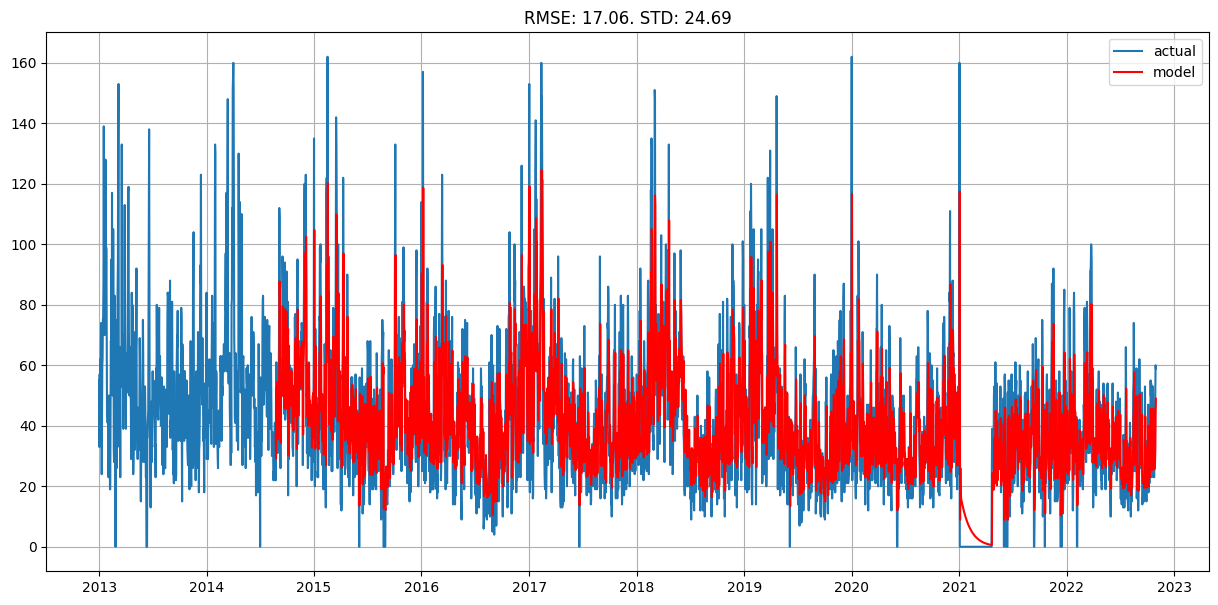

In [72]:
plt.figure(figsize=(15, 7))
plt.title("RMSE: %.2f. STD: %.2f" % (rmse_mean, dfs['STA-NL00701']['AQI'].std()))
plt.plot(dfs['STA-NL00701'], label="actual")
plt.plot(all_predictions, color="r", label="model")
#plt.axvspan(dfs.index[-1], predictions.index[-1], alpha=0.5, color="lightgrey")
plt.legend()
plt.grid(True)
plt.show()

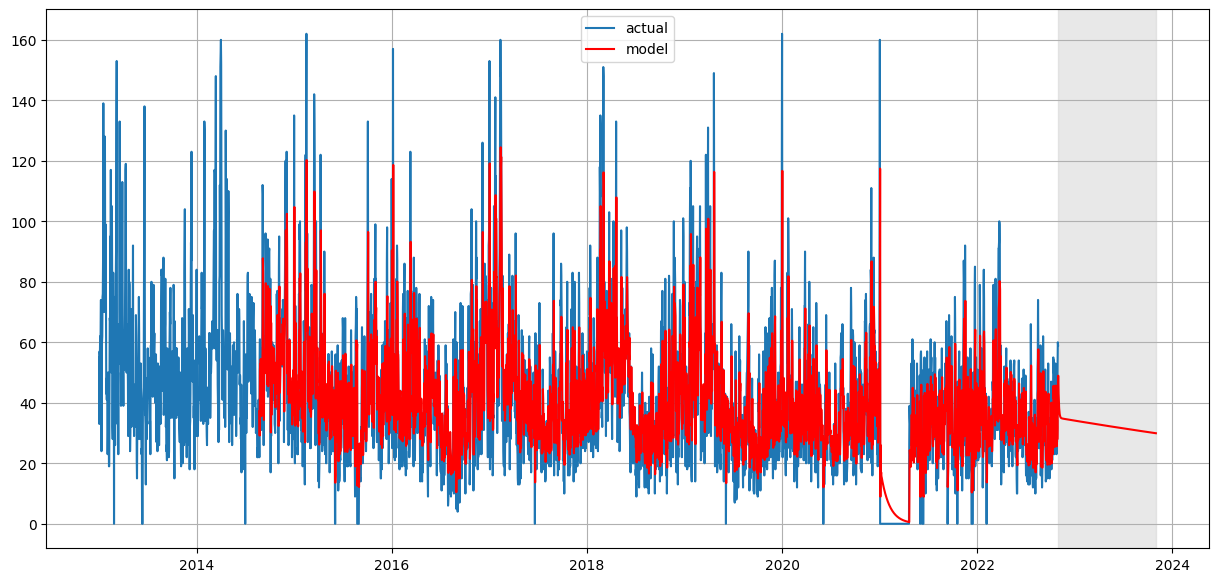

In [77]:
from copy import deepcopy

data = deepcopy(dfs['STA-NL00701'])
data.columns = ["actual"]
data["arima_model"] = all_predictions
# forecasting on n_steps forward
forecast = model.predict(start=data.shape[0], end=data.shape[0] + 365)
forecast = data.arima_model.append(forecast)
# calculate error, again having shifted on s+d steps from the beginning
# error=np.sqrt(mean_squared_error(
#     data["actual"][s + d:], data["arima_model"][s + d:]
# ))

plt.figure(figsize=(15, 7))
#plt.title("RMSE: {0:.2f}%".format(error))
plt.plot(data.actual, label="actual")
plt.plot(forecast, color="r", label="model")
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color="lightgrey")
plt.legend()
plt.grid(True)
plt.show()